<a href="https://colab.research.google.com/github/TdizzleIsAFK/Web-Dev-For-Beginners/blob/main/Conoco_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [ ]:
oil_data = pd.read_csv("/content/oil_production_data_new.csv")
df_oil_data = oil_data.rename(columns={"Crude oil production (thousand in barrels)": "Oil Prod",
                                       "Production Y-o-Y": "Prod Change Y-o-Y",
                                       "National Average Gas Price (Dollars/Gallon) In 2022 Dollars": "Gas Price adj.2022"})
df_oil_data


,year,Oil Prod,Prod Change Y-o-Y,Gas Price adj.2022,CPI,GDP,Per Capita,Growth
0,1980,3146365,NaN,$4.25,270.970,"$22,996.10B","$69,288",5.67%
1,1981,3128624,-17741.0,$4.25,258.811,"$20,893.74B","$63,028",-3.40%
2,1982,3156715,28091.0,$3.72,255.657,"$21,372.57B","$65,095",2.29%
3,1983,3170999,14284.0,$3.40,251.107,"$20,527.16B","$62,805",2.92%
4,1984,3249696,78697.0,$3.17,245.120,"$19,479.62B","$59,915",2.26%
5,1985,3274553,24857.0,$3.03,240.011,"$18,695.11B","$57,867",1.67%
6,1986,3168252,-106301.0,$2.29,237.017,"$18,206.02B","$56,763",2.71%
7,1987,3047378,-120874.0,$2.31,236.736,"$17,550.68B","$55,124",2.29%
8,1988,2979123,-68255.0,$2.22,232.957,"$16,843.19B","$53,291",1.84%
9,1989,2778773,-200350.0,$2.35,229.594,"$16,253.97B","$51,784",2.28%


In [ ]:
le = LabelEncoder()
for index in df_oil_data.columns:
    if df_oil_data[index].dtype == "O":
        df_oil_data[index] = le.fit_transform(df_oil_data[index])


In [ ]:
df_oil_data.dtypes


year                    int64
Oil Prod                int64
Prod Change Y-o-Y     float64
Gas Price adj.2022      int64
CPI                   float64
GDP                     int64
Per Capita              int64
Growth                  int64
dtype: object

In [ ]:
df_oil_data.describe


<bound method NDFrame.describe of     year  Oil Prod  Prod Change Y-o-Y  Gas Price adj.2022      CPI  GDP  \
0   1980   3146365                NaN                  33  270.970   22   
1   1981   3128624           -17741.0                  33  258.811   20   
2   1982   3156715            28091.0                  30  255.657   21   
3   1983   3170999            14284.0                  27  251.107   19   
4   1984   3249696            78697.0                  24  245.120   17   
5   1985   3274553            24857.0                  22  240.011   16   
6   1986   3168252          -106301.0                   7  237.017   15   
7   1987   3047378          -120874.0                   8  236.736   14   
8   1988   2979123           -68255.0                   4  232.957   13   
9   1989   2778773          -200350.0                  10  229.594   12   
10  1990   2684687           -94086.0                  16  224.939   11   
11  1991   2707039            22352.0                  12  218.056

In [ ]:
df_oil_data.corr


<bound method DataFrame.corr of     year  Oil Prod  Prod Change Y-o-Y  Gas Price adj.2022      CPI  GDP  \
0   1980   3146365                NaN                  33  270.970   22   
1   1981   3128624           -17741.0                  33  258.811   20   
2   1982   3156715            28091.0                  30  255.657   21   
3   1983   3170999            14284.0                  27  251.107   19   
4   1984   3249696            78697.0                  24  245.120   17   
5   1985   3274553            24857.0                  22  240.011   16   
6   1986   3168252          -106301.0                   7  237.017   15   
7   1987   3047378          -120874.0                   8  236.736   14   
8   1988   2979123           -68255.0                   4  232.957   13   
9   1989   2778773          -200350.0                  10  229.594   12   
10  1990   2684687           -94086.0                  16  224.939   11   
11  1991   2707039            22352.0                  12  218.056  

In [ ]:
df = df_oil_data[["Oil Prod", "GDP"]]
# normalizing inputs
X = preprocessing.scale(df)
df

,Oil Prod,GDP
0,3146365,22
1,3128624,20
2,3156715,21
3,3170999,19
4,3249696,17
5,3274553,16
6,3168252,15
7,3047378,14
8,2979123,13
9,2778773,12


In [ ]:
model = KMeans(n_clusters = 5)
y_model = model.fit_predict(X)

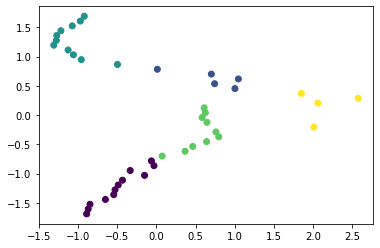

In [ ]:
plt.scatter(X[:,0], X[:,1], c=model.labels_, cmap='viridis')

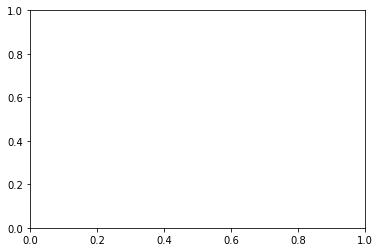

In [ ]:
sns.lineplot()